In [1]:
import urllib
import io, re

In [2]:
with urllib.request.urlopen('https://imos-data.aodn.org.au/IMOS/ANMN/Acoustic/PAPCA/3444/20161002/raw/57F04DF1.DAT') as f:
    data = f.readlines()

In [3]:
header, body = data[:5], data[5:]

In [4]:
header = [h.decode() for h in header]

In [5]:
header

['Record Header-       E24 set# 3444\n',
 'Schedule 1 2016/10/02 00:00:01 - 48836\n',
 'Sample Rate 06000 Duration 0000000300\n',
 'Filter 0 C0=1 C1=0 LF=008 HF=02800 PG=010 G=001\n',
 'Filter 1 C2=0 C3=0 LF=008 HF=05000 PG=001 G=001\n']

In [6]:
match = re.match('Sample Rate ([0-9]*) Duration ([0-9]*)', header[2])
SampleRate = int(match.group(1))
Duration = int(match.group(2))

In [7]:
match = re.match('Schedule [0-9]* ([0-9]{4})\/([0-9]{2})\/([0-9]{1,2}) ([0-9:]*) - ([0-9]*)', header[1])
match.groups()

('2016', '10', '02', '00:00:01', '48836')

In [8]:
# https://regex101.com/

In [9]:
body[0]

b'\x7f#~\xdd\x7f\x01~\xde~\xac~\xb1~\xa9~\x96~\xdc~\xcc\x7f\n'

In [10]:
import numpy as np

In [11]:
np.fromfile(body[0])

FileNotFoundError: [Errno 2] No such file or directory: b'\x7f#~\xdd\x7f\x01~\xde~\xac~\xb1~\xa9~\x96~\xdc~\xcc\x7f\n'

In [12]:
import struct
volts = struct.unpack("h" * ((len(body)) // 2), body)

TypeError: a bytes-like object is required, not 'list'

In [13]:
list_of_bytes = [bytes(element) for element in body]

In [14]:
list_of_bytes = b'<\>'.join(list_of_bytes)

In [37]:
volts = struct.unpack("H" * ((len(list_of_bytes)) // 2), list_of_bytes)

In [39]:
n_channels = 1
volts = np.array(volts).reshape(-1, n_channels)

In [40]:
volts.shape

(1858764, 1)

In [41]:
#Convert to actual Volts
Fullscale = 5 #	0 to 5 V
#Multiply by this factor to convert A/D counts to volts 0-5
CountsToVolts = Fullscale / 65536 

In [42]:
Volts = np.multiply(CountsToVolts, volts) - np.mean(np.multiply(volts, CountsToVolts))

In [35]:
Volts = (CountsToVolts * volts) - np.mean(np.multiply(volts, CountsToVolts))

In [46]:
np.mean(np.multiply(volts, CountsToVolts))

2.5658492132259156

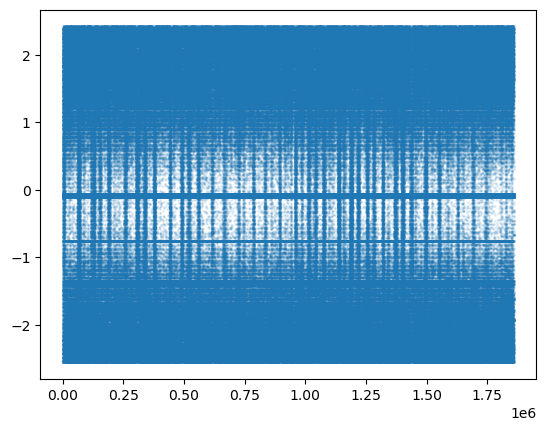

In [49]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(0, len(Volts)), Volts, alpha=0.1, s=1)

In [61]:
import matlab as matlab
matlab.engine.start_matlab

ModuleNotFoundError: No module named 'matlab'